# Gold Price Prediction

## 1. Data Preprocessing and EDA:
### 1. a. Preprocessing and Visualization

## 2. Model Building:
### 2. 1. Simple Linear Regression
### 2. 2. ARIMA
### 2. 3. SARIMA
### 2. 4. Prophet
### 2. 5. Hyperparameter tuning
### 2. 6. Evaluation
### 2. 7. Streamlit deployment

## Importing Necessary Libraries

In [1]:
## Import necessary libraries

# For Preprocessing and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# For ARIMA and SARIMA
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import itertools

# For Prophet
from prophet import Prophet

# For Streamlit deployment
!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


## 1. Data Preprocessing and EDA:
### a. Loading the dataset
### b. Converting dates and set the index
### c. Visualizing the data

In [2]:
# a. Load the dataset
gold_df = pd.read_csv('Gold_data.csv')

In [3]:
# b. Convert 'date' column to datetime and set it as index
gold_df['date'] = pd.to_datetime(gold_df['date'])
gold_df.set_index('date', inplace=True)
gold_df.sort_index(inplace=True)

In [4]:
# Quick summary and check missing values
print("Missing values per column:\n", gold_df.isnull().sum())
print("Data summary:\n", gold_df.describe())

Missing values per column:
 price    0
dtype: int64
Data summary:
              price
count  2182.000000
mean   3284.450046
std     719.564434
min    2252.600000
25%    2697.020000
50%    2879.800000
75%    4147.325000
max    4966.300000


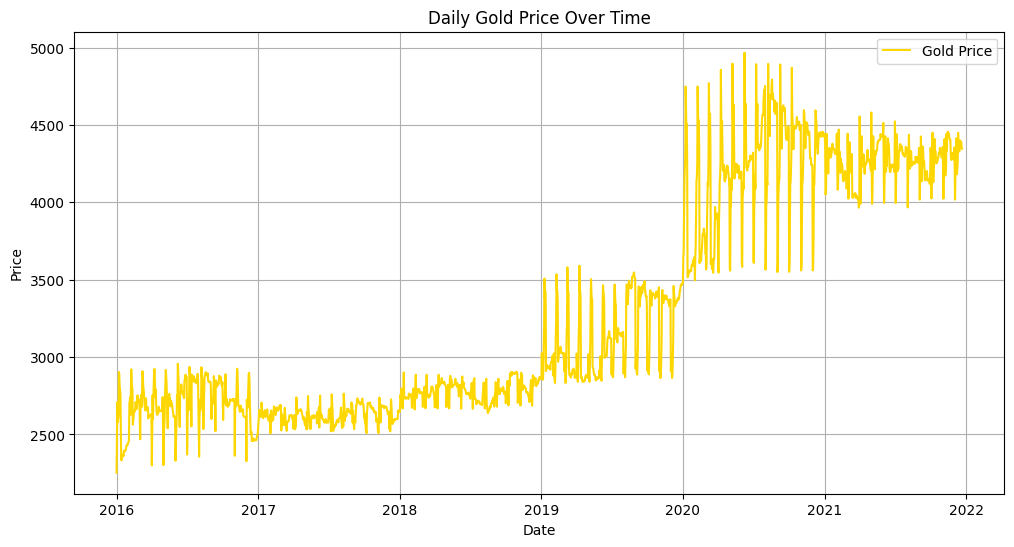

In [5]:
# Visualizing the data
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(gold_df.index, gold_df['price'], color='gold', label='Gold Price')
plt.title('Daily Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 2. Model Building:
## 2. 1. Simple Linear Regression
### a. Convert dates into a numeric feature
### b. Train/test split, training the linear regression model
### c. Evaluate with RMSE and MAE



In [6]:
# 2. Model 1: Simple Linear Regression

# Convert date index to a numerical variable (ordinal)
gold_df['time_ordinal'] = gold_df.index.map(pd.Timestamp.toordinal)

In [7]:
# Define feature and target variables
X = gold_df[['time_ordinal']]
y = gold_df['price']

In [8]:
# Train-test split (Split into training and testing sets - 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [9]:
# Model training (Instantiate and fit the linear regression model)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Prediction
y_pred_lr = lr_model.predict(X_test)

# Evaluate on test set
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MAE:", mae_lr)

Linear Regression RMSE: 336.1625131235629
Linear Regression MAE: 284.22227432470834


# 2.1.Simple Linear Regression:

## Purpose: Predict future prices based on a linear trend over time.
## Feature Engineering: Convert dates into ordinal numbers (toordinal) so that regression can use them as numeric features.
## Split Data: Train/test split (no shuffling to preserve time-series order).
## Model Training: LinearRegression() fits a straight line that best approximates the trend in the training data.
## Forecasting: Predicts future prices based on the learned linear trend.

## 2. 2. ARIMA Model:
### a. Grid search over a set of (p, d, q) parameters using the training set
### b. Fit the selected ARIMA model and forecast
### c. Evaluate predictions

In [11]:
# Model 2.2: ARIMA

# Defining the range for hyperparameters p, d, q. In production, expand grid search as needed.
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [12]:
# Using a simple grid search to select the best ARIMA parameters based on AIC
best_aic = np.inf
best_order = None
best_mdl = None

In [13]:
# We use a subset of the data for model selection (train split)
train_arima = gold_df['price'][:int(len(gold_df)*0.8)]

for order in pdq:
    try:
        mdl = sm.tsa.ARIMA(train_arima, order=order).fit()
        if mdl.aic < best_aic:
            best_aic = mdl.aic
            best_order = order
            best_mdl = mdl
    except Exception as e:
        continue

print("Best ARIMA order:", best_order, "with AIC:", best_aic)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best ARIMA order: (2, 1, 2) with AIC: 21313.55797941653


In [14]:
# Fitting ARIMA with best parameters on entire training data and forecast for test period length
arima_model = sm.tsa.ARIMA(train_arima, order=best_order).fit()
n_test = len(gold_df) - len(train_arima)
arima_forecast = arima_model.forecast(steps=n_test)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
# Evaluate ARIMA
actual = gold_df['price'][len(train_arima):]
rmse_arima = np.sqrt(mean_squared_error(actual, arima_forecast))
mae_arima = mean_absolute_error(actual, arima_forecast)
print("ARIMA RMSE:", rmse_arima)
print("ARIMA MAE:", mae_arima)

ARIMA RMSE: 189.95470949063267
ARIMA MAE: 144.95111053544798


# 2.2. ARIMA

## Purpose: Model autocorrelation in time series and trend using differencing and moving average.
## Hyperparameters:
### p: autoregressive order
### d: degree of differencing (to remove trend)
### q: moving average order
## Grid Search: Loop through combinations of (p,d,q) and select the one with the lowest AIC (Akaike Information Criterion).
## Model Fitting: Fit best ARIMA model on training data.
## Forecasting:

## 2. 3: SARIMA Model
### a. Grid search over seasonal parameters (P, D, Q, s)
### b. Fit a SARIMA model on the data
### c. Forecast and evaluate

In [16]:
# Model 2. 3: SARIMA

# Defining seasonal parameters. Assuming seasonality of 7 days if weekly periodicity, or adjust as needed.
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(range(0, 2), range(0, 2), range(0, 2)))]
best_aic_sarima = np.inf
best_order_sarima = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic_sarima:
                best_aic_sarima = results.aic
                best_order_sarima = param
                best_seasonal_order = param_seasonal
        except Exception as e:
            continue

print("Best SARIMA order:", best_order_sarima, "Seasonal order:", best_seasonal_order, "with AIC:", best_aic_sarima)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best SARIMA order: (1, 1, 2) Seasonal order: (1, 1, 1, 7) with AIC: 21086.14458560708


In [17]:
# Fitting the best SARIMA model on training data
sarima_model = sm.tsa.statespace.SARIMAX(train_arima,
                                         order=best_order_sarima,
                                         seasonal_order=best_seasonal_order,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=n_test)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
# Evaluate SARIMA
rmse_sarima = np.sqrt(mean_squared_error(actual, sarima_forecast))
mae_sarima = mean_absolute_error(actual, sarima_forecast)
print("SARIMA RMSE:", rmse_sarima)
print("SARIMA MAE:", mae_sarima)

SARIMA RMSE: 451.3292180207391
SARIMA MAE: 403.68725560697027


# 2.3. SARIMA:
## Purpose: Handle seasonality in time series along with trend and noise.
## Seasonal Parameters:
### (P,D,Q,s) where:
### P: seasonal autoregression
### D: seasonal differencing
### Q: seasonal moving average
### s: seasonal cycle length (e.g., 7 for weekly pattern)
## Grid Search: Evaluate multiple SARIMA configurations using AIC.
## Model Fitting: Best model is fitted on training data.
## Forecasting:

## 2. 4: Prophet Model
### Prepare the data format required by Prophet
###  Tune key hyperparameters (like changepoint_prior_scale, seasonality_mode)
### Forecast future values and compute evaluation metrics

In [19]:
# Model 4: Prophet

# Prophet requires data to be in a specific format with columns 'ds' and 'y'
prophet_df = gold_df[['price']].reset_index().rename(columns={'date': 'ds', 'price': 'y'})


In [27]:
prophet_model = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=True,
    weekly_seasonality=True
)

In [20]:
# Split the data into training and testing set
train_size = int(0.8 * len(prophet_df))
train_prophet = prophet_df[:train_size]
test_prophet = prophet_df[train_size:]

In [21]:
# Define and fit the Prophet model
# Here we tune 'changepoint_prior_scale' and use additive seasonality by default.
prophet_model = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwp39xpjl/ytcilnyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwp39xpjl/5ymbax0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42822', 'data', 'file=/tmp/tmpwp39xpjl/ytcilnyz.json', 'init=/tmp/tmpwp39xpjl/5ymbax0t.json', 'output', 'file=/tmp/tmpwp39xpjl/prophet_models4vjnpqu/prophet_model-20250530045348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
# Forecast using Prophet for the length of the test set
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='D')
forecast = prophet_model.predict(future)

In [23]:
# Extract predicted values for the test period
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[test_prophet['ds']]
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], forecast_test['yhat']))
mae_prophet = mean_absolute_error(test_prophet['y'], forecast_test['yhat'])
print("Prophet RMSE:", rmse_prophet)
print("Prophet MAE:", mae_prophet)

Prophet RMSE: 1156.8878287059583
Prophet MAE: 1058.4249548594107


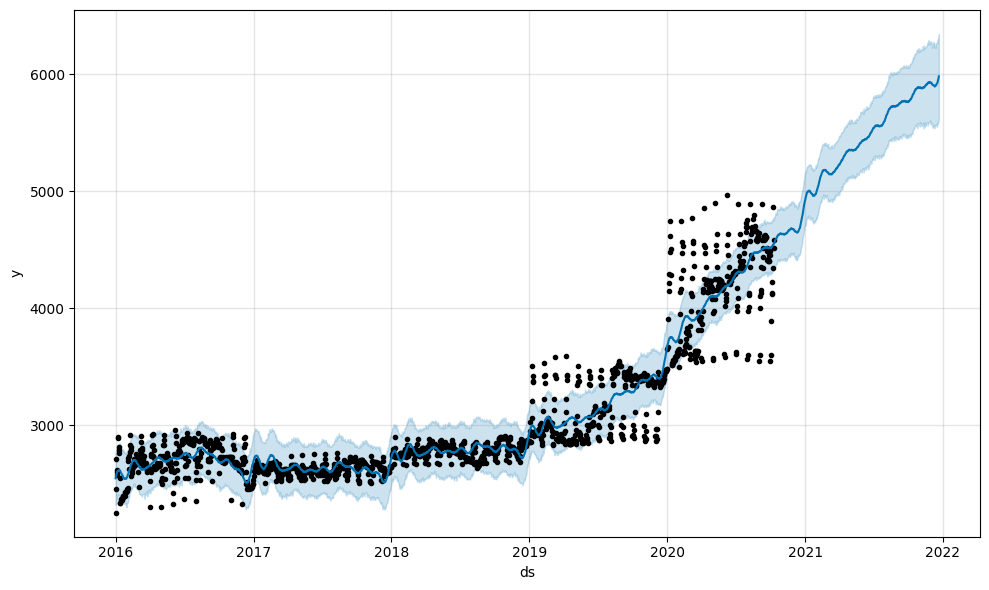

In [24]:
# Plot Prophet forecast (optional)
fig = prophet_model.plot(forecast)
plt.show()

# 2.4. Prophet:
## Purpose: Designed for business time series with strong seasonality and holidays.
## Data Format: Prophet requires:
### ds (datestamp)
### y (value to forecast)
## Hyperparameters:
### changepoint_prior_scale: flexibility of trend change
### weekly/yearly_seasonality: controls periodic patterns
## Training: Uses additive model with trend, seasonality, and holidays.
## Forecasting:

## 2.5: Model Selection Summary

In [25]:
# 2.5: Model Selection Summary
print("Model Evaluation Metrics:")
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}")
print(f"ARIMA           - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")
print(f"SARIMA          - RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f}")
print(f"Prophet         - RMSE: {rmse_prophet:.2f}, MAE: {mae_prophet:.2f}")

Model Evaluation Metrics:
Linear Regression - RMSE: 336.16, MAE: 284.22
ARIMA           - RMSE: 189.95, MAE: 144.95
SARIMA          - RMSE: 451.33, MAE: 403.69
Prophet         - RMSE: 1156.89, MAE: 1058.42


# 3. Streamlit Deployment:
## Streamlit creates an interactive dashboard for non-technical users.
## Features:
### Choose model (from dropdown)
### Input forecast horizon
### View forecast plot and evaluation
## Dynamic Forecasting: Runs the corresponding model based on user input and plots results:

In [28]:
streamlit_code = r'''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

@st.cache
def load_data():
    data = pd.read_csv("Gold_data.csv")
    data['date'] = pd.to_datetime(data['date'])
    data.set_index("date", inplace=True)
    data.sort_index(inplace=True)
    return data

gold_df = load_data()

st.title("Gold Price Prediction Dashboard")
st.write("This app allows you to choose a model and forecast gold prices.")

# Sidebar for model selection and future forecast periods
model_choice = st.sidebar.selectbox("Select Model", ["Linear Regression", "ARIMA", "SARIMA", "Prophet"])
future_periods = st.sidebar.number_input("Number of days to forecast", min_value=1, max_value=365, value=30)

st.subheader("Data Overview")
st.write(gold_df.head())

# Display time series plot
st.subheader("Time Series Plot")
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(gold_df.index, gold_df['price'], color='gold', label='Gold Price')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
st.pyplot(fig)

# Define function for each model prediction

def linear_regression_model(data, forecast_periods):
    data['time_ordinal'] = data.index.map(pd.Timestamp.toordinal)
    X = data[['time_ordinal']]
    y = data['price']
    model = LinearRegression().fit(X, y)
    # Forecast future
    last_date = data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, forecast_periods+1)]
    future_ordinals = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
    forecast = model.predict(future_ordinals)
    return future_dates, forecast

def arima_model_forecast(data, order, forecast_periods):
    train = data['price']
    model = sm.tsa.ARIMA(train, order=order).fit()
    forecast = model.forecast(steps=forecast_periods)
    future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods)
    return future_dates, forecast

def prophet_model_forecast(data, forecast_periods):
    df_prophet = data[['price']].reset_index().rename(columns={'date': 'ds', 'price': 'y'})
    model = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=True)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=forecast_periods)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']].tail(forecast_periods)['ds'], forecast[['ds', 'yhat']].tail(forecast_periods)['yhat']

# Display forecast based on selected model
if model_choice == "Linear Regression":
    forecast_dates, forecast_values = linear_regression_model(gold_df.copy(), future_periods)
elif model_choice == "ARIMA":
    # For demo purposes, using a preset order; in production, use hyperparameter tuning.
    forecast_dates, forecast_values = arima_model_forecast(gold_df.copy(), order=(1,1,1), forecast_periods=future_periods)
elif model_choice == "SARIMA":
    # For demo purposes, using a preset order; adjust the seasonal order as needed.
    model = sm.tsa.statespace.SARIMAX(gold_df['price'], order=(1,1,1), seasonal_order=(1,1,1,7)).fit(disp=False)
    forecast_values = model.forecast(steps=future_periods)
    forecast_dates = pd.date_range(start=gold_df.index[-1] + pd.Timedelta(days=1), periods=future_periods)
elif model_choice == "Prophet":
    forecast_dates, forecast_values = prophet_model_forecast(gold_df.copy().reset_index().rename(columns={'index': 'date'}), future_periods)

# Plot forecast results
st.subheader(f"Forecast using {model_choice}")
fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.plot(gold_df.index, gold_df['price'], label="Historical", color='gold')
ax2.plot(forecast_dates, forecast_values, label="Forecast", color='green', marker='o')
ax2.set_xlabel("Date")
ax2.set_ylabel("Price")
ax2.legend()
st.pyplot(fig2)
'''

# Optionally, save the streamlit code to a file for deployment
with open("app.py", "w") as f:
    f.write(streamlit_code)

print("Streamlit deployment code saved as app.py")


Streamlit deployment code saved as app.py
